# 환경지표

# 군집화

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist, pdist
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings(action='ignore')

C:\Users\ppi06\anaconda3\envs\data_venv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data_path = "C:/sooeun/DATAexam/ConvergenceProject-School_Violence/Data/"

In [4]:
# 학교폭력에 영향을 미치는 변수 상관계수
features = pd.read_csv(data_path + "서울특별시_스케일링_상관관계_유의미한_변수_환경지표.csv", index_col=0)
features['변수'][features['변수'] == '월평균소득금액_백만'] = '월평균소득금액(십만)'
features
# features.drop(index=[10,11], axis=0,inplace=True)

,변수,상관관계
0,한부모가족지원법수급자_재가보호_가구원수,0.569231
1,국민기초생활보장법수급자_가구원수,0.641538
2,중간,0.511252
3,고소득,-0.241538
4,성인게임장수,0.324399
5,사건종별가정폭력,0.693846
6,사건종별데이트폭력,0.480769
7,월평균소득금액(십만),-0.456154
8,다문화가족,0.370000


In [5]:
data = pd.read_csv(data_path + "서울특별시_스케일링_고등학교지표_유의미한_변수_환경지표.csv", index_col=0)
# data.drop(['국제결혼가정','외국인가정'],axis=1,inplace=True)
data.head(1)

,학교명,시군구,한부모가족지원법수급자_재가보호_가구원수,국민기초생활보장법수급자_가구원수,중간,고소득,성인게임장수,사건종별가정폭력,사건종별데이트폭력,월평균소득금액(십만),다문화가족,학교폭력신고수,피해 응답 학생 수
0,가락고등학교,송파구,10.587907,41.944982,61.9,21.3,10.0,4.611694,0.673981,39.69562,1.666742,0.521641,0.121655


In [6]:
combined_data = data[features['변수']]
combined_data['학교명'] = data['학교명']
combined_data.set_index('학교명', inplace=True)
combined_data.head(3)

,한부모가족지원법수급자_재가보호_가구원수,국민기초생활보장법수급자_가구원수,중간,고소득,성인게임장수,사건종별가정폭력,사건종별데이트폭력,월평균소득금액(십만),다문화가족
학교명,,,,,,,,,
가락고등학교,10.587907,41.944982,61.9,21.3,10.0,4.611694,0.673981,39.69562,1.666742
가재울고등학교,16.758591,47.709712,46.9,20.2,5.0,3.501553,0.504236,39.43923,1.741705
강동고등학교,14.148759,48.663157,52.6,19.8,15.0,4.690014,0.769964,33.36210,1.334094


In [7]:
sd = StandardScaler()
total_sd = pd.DataFrame(sd.fit_transform(combined_data))
total_sd.index = combined_data.index
total_sd.columns = combined_data.columns
total_sd.head(1)

,한부모가족지원법수급자_재가보호_가구원수,국민기초생활보장법수급자_가구원수,중간,고소득,성인게임장수,사건종별가정폭력,사건종별데이트폭력,월평균소득금액(십만),다문화가족
학교명,,,,,,,,,
가락고등학교,-0.863477,-0.590645,1.331476,-0.518005,-0.357818,0.663799,-0.14572,0.923313,-0.68514


# Elbow Method(Standard Scaler)

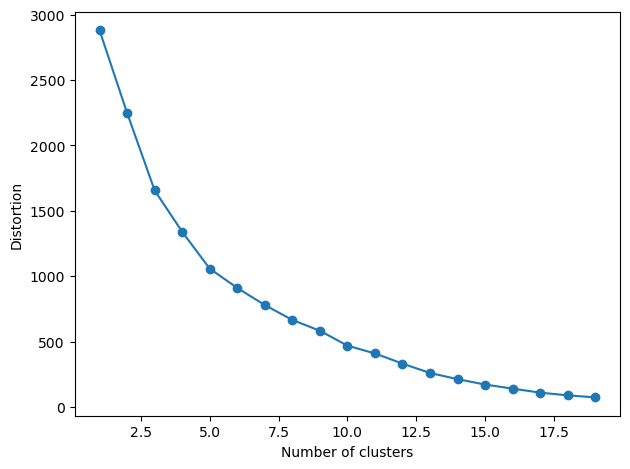

In [8]:
dist =[]
for i in range(1,20):
    k = KMeans(n_clusters=i,
          init='k-means++',
           n_init=10,
           max_iter=300,
            random_state=800)
    # k.fit(total_sd)
    k.fit(total_sd)
    dist.append(k.inertia_)

plt.plot(range(1,20),dist, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

# KMeans(Standard Scaler)

In [9]:
np.random.seed(3)

In [10]:
total_sd_value = total_sd.values

#k값을 5로 설정 후 k-means에 적용
kmeans = KMeans(n_clusters =5,   random_state=800).fit(total_sd_value)
kmeans.cluster_centers_

kmeans.predict(pd.DataFrame(total_sd.iloc[0]).T)
# kmeans.predict(total_sd)

array([3])

In [11]:
total_sd['cluster'] = kmeans.labels_
total_sd.head(1)

,한부모가족지원법수급자_재가보호_가구원수,국민기초생활보장법수급자_가구원수,중간,고소득,성인게임장수,사건종별가정폭력,사건종별데이트폭력,월평균소득금액(십만),다문화가족,cluster
학교명,,,,,,,,,,
가락고등학교,-0.863477,-0.590645,1.331476,-0.518005,-0.357818,0.663799,-0.14572,0.923313,-0.68514,3


In [12]:
# 저장 후 주석처리 
total_sd.to_csv(data_path + "서울특별시_고등학교별_cluster_환경지표.csv")

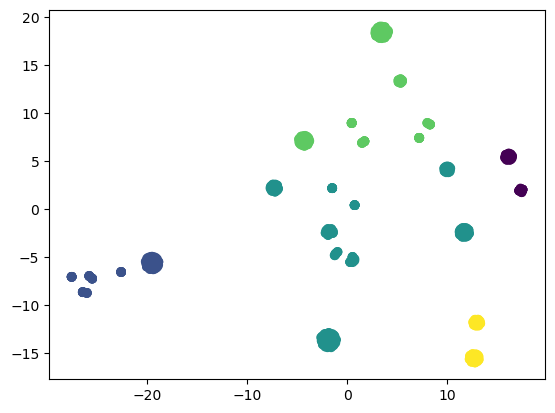

In [13]:
# TSNE 사용 후 클러스터링
model = TSNE(learning_rate=100,   random_state=800)
transformed = model.fit_transform(total_sd.iloc[:,:10])

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=kmeans.labels_)

plt.show()

# 서울시 고등학교 점수

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 그래프 시각화 라이브러리 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import warnings
warnings.filterwarnings(action='ignore')

In [15]:
data = pd.read_csv(data_path + "서울특별시_스케일링_고등학교지표_유의미한_변수_환경지표.csv", index_col=0)
data
# data.drop(['국제결혼가정','외국인가정'],axis=1,inplace=True)

,학교명,시군구,한부모가족지원법수급자_재가보호_가구원수,국민기초생활보장법수급자_가구원수,중간,고소득,성인게임장수,사건종별가정폭력,사건종별데이트폭력,월평균소득금액(십만),다문화가족,학교폭력신고수,피해 응답 학생 수
0,가락고등학교,송파구,10.587907,41.944982,61.9,21.3,10.0,4.611694,0.673981,39.69562,1.666742,0.521641,0.121655
1,가재울고등학교,서대문구,16.758591,47.709712,46.9,20.2,5.0,3.501553,0.504236,39.43923,1.741705,0.488599,0.000000
2,강동고등학교,강동구,14.148759,48.663157,52.6,19.8,15.0,4.690014,0.769964,33.36210,1.334094,0.568288,0.165289
3,강서고등학교,양천구,15.982703,58.270272,62.8,13.5,6.0,4.280519,0.412517,35.63309,2.478195,0.488209,0.000000
4,강서공업고등학교,강서구,20.076996,67.130300,62.7,17.2,15.0,5.099763,1.060769,31.65221,2.591578,0.508223,0.630252
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,효문고등학교,도봉구,27.773168,85.260808,56.2,29.7,16.0,5.916945,0.840188,27.13315,1.507146,0.741091,0.220264
316,휘경공업고등학교,동대문구,17.442884,53.493406,46.3,22.0,16.0,4.093672,0.909075,30.11303,3.348503,0.646325,0.401606
317,휘경여자고등학교,동대문구,17.442884,53.493406,46.3,22.0,16.0,4.093672,0.909075,30.11303,3.348503,0.646325,0.000000
318,휘문고등학교,강남구,6.136110,30.717739,44.9,34.7,2.0,2.146930,1.160593,47.99007,1.330665,0.210120,0.083126


In [16]:
# 학교폭력에 영향을 미치는 변수 상관계수
features = pd.read_csv(data_path +"서울특별시_스케일링_상관관계_유의미한_변수_환경지표.csv", index_col=0)
features['변수'][features['변수'] == '월평균소득금액_백만'] = '월평균소득금액(십만)'
# features.drop(index=[10,11], axis=0,inplace=True)
features

,변수,상관관계
0,한부모가족지원법수급자_재가보호_가구원수,0.569231
1,국민기초생활보장법수급자_가구원수,0.641538
2,중간,0.511252
3,고소득,-0.241538
4,성인게임장수,0.324399
5,사건종별가정폭력,0.693846
6,사건종별데이트폭력,0.480769
7,월평균소득금액(십만),-0.456154
8,다문화가족,0.370000


In [17]:
# 사용할 컬럼만 추출
combined_data = data[features['변수']]
combined_data['학교명'] = data['학교명']
combined_data.set_index('학교명', inplace=True)
combined_data

,한부모가족지원법수급자_재가보호_가구원수,국민기초생활보장법수급자_가구원수,중간,고소득,성인게임장수,사건종별가정폭력,사건종별데이트폭력,월평균소득금액(십만),다문화가족
학교명,,,,,,,,,
가락고등학교,10.587907,41.944982,61.9,21.3,10.0,4.611694,0.673981,39.69562,1.666742
가재울고등학교,16.758591,47.709712,46.9,20.2,5.0,3.501553,0.504236,39.43923,1.741705
강동고등학교,14.148759,48.663157,52.6,19.8,15.0,4.690014,0.769964,33.36210,1.334094
강서고등학교,15.982703,58.270272,62.8,13.5,6.0,4.280519,0.412517,35.63309,2.478195
강서공업고등학교,20.076996,67.130300,62.7,17.2,15.0,5.099763,1.060769,31.65221,2.591578
...,...,...,...,...,...,...,...,...,...
효문고등학교,27.773168,85.260808,56.2,29.7,16.0,5.916945,0.840188,27.13315,1.507146
휘경공업고등학교,17.442884,53.493406,46.3,22.0,16.0,4.093672,0.909075,30.11303,3.348503
휘경여자고등학교,17.442884,53.493406,46.3,22.0,16.0,4.093672,0.909075,30.11303,3.348503


In [18]:
# 학교별 상관관계 합 계산
total_score = []

for col, item in combined_data.T.iteritems():
    total_score.append(sum(item.values * features['상관관계']))

In [19]:
# total score와 학교폭력신고수를 합친 데이터프레임 생성
school_score = pd.DataFrame(total_score)
school_score.index = combined_data.index
school_score.columns=['score']
school_score.reset_index(inplace=True)
school_score['학교폭력신고수'] = data['학교폭력신고수']

# score 0~10으로
# school_score['score'] -= school_score['score'].min()
# school_score['score'] = school_score['score'] * (100 / school_score['score'].max())
school_score['score']

0      48.715229
1      46.193799
2      55.148267
3      65.103834
4      77.831186
         ...    
315    89.946627
316    58.574818
317    58.574818
318    19.071217
319    58.574818
Name: score, Length: 320, dtype: float64

In [20]:
# 저장 후 주석처리
school_score.to_csv("C:\sooeun\DATAexam\ConvergenceProject-School_Violence\Data\학교별_종합점수_환경지표.csv")

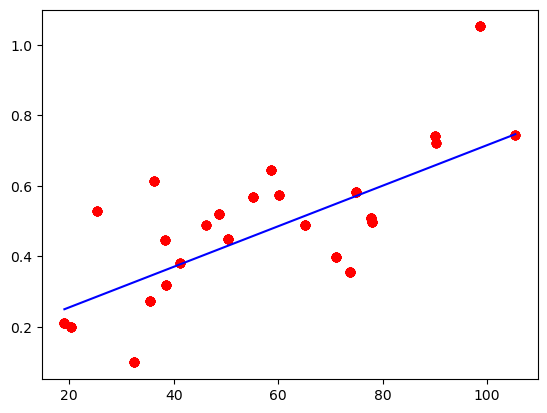

In [21]:
# score<->신고수 scatter
plt.scatter(school_score['score'], school_score['학교폭력신고수'], color = 'red')

# fit line 그리기
fit_line = np.polyfit(school_score['score'], school_score['학교폭력신고수'], 1)
fit_line
x_minmax = np.array([min(school_score['score']), max(school_score['score'])]) # x축 최소값, 최대값
fit_y = x_minmax * fit_line[0] + fit_line[1]
plt.plot(x_minmax, fit_y, color = 'blue', markersize=1)

# 학교별 Total Score

In [22]:
score = pd.read_csv("C:\sooeun\DATAexam\ConvergenceProject-School_Violence\Data\학교별_종합점수_환경지표.csv", index_col=0)
score.set_index('학교명', inplace=True)
score.head()

,score,학교폭력신고수
학교명,,
가락고등학교,48.715229,0.521641
가재울고등학교,46.193799,0.488599
강동고등학교,55.148267,0.568288
강서고등학교,65.103834,0.488209
강서공업고등학교,77.831186,0.508223


In [23]:
# 각각의 DF에 score 컬럼 추가
total_sd['score'] = score['score']
combined_data['score'] = score['score']

display(total_sd.head(1))
display(combined_data.head(1))

,한부모가족지원법수급자_재가보호_가구원수,국민기초생활보장법수급자_가구원수,중간,고소득,성인게임장수,사건종별가정폭력,사건종별데이트폭력,월평균소득금액(십만),다문화가족,cluster,score
학교명,,,,,,,,,,,
가락고등학교,-0.863477,-0.590645,1.331476,-0.518005,-0.357818,0.663799,-0.14572,0.923313,-0.68514,3,48.715229


,한부모가족지원법수급자_재가보호_가구원수,국민기초생활보장법수급자_가구원수,중간,고소득,성인게임장수,사건종별가정폭력,사건종별데이트폭력,월평균소득금액(십만),다문화가족,score
학교명,,,,,,,,,,
가락고등학교,10.587907,41.944982,61.9,21.3,10.0,4.611694,0.673981,39.69562,1.666742,48.715229


# 각 Cluster의 평균

In [24]:
total_sd.groupby('cluster').mean()

,한부모가족지원법수급자_재가보호_가구원수,국민기초생활보장법수급자_가구원수,중간,고소득,성인게임장수,사건종별가정폭력,사건종별데이트폭력,월평균소득금액(십만),다문화가족,score
cluster,,,,,,,,,,
0,0.351545,-1.045552,-1.981963,1.962172,-0.185035,-1.633253,-0.976517,-0.562220,2.303687,33.722811
1,1.610228,1.318344,0.998032,-0.462130,0.023111,1.338695,1.096822,-0.825013,-0.281325,88.492122
2,0.053315,0.368496,-0.066179,-0.470986,-0.282428,0.071619,-0.617887,-0.182914,-0.230258,62.155841
3,-1.113130,-0.996492,-0.122891,0.487888,-0.553449,-0.471556,0.240859,1.214688,-0.500694,32.067970
4,-0.201207,-0.091992,0.402318,-0.340316,2.780566,-0.022251,0.486550,-0.841427,0.971759,74.753484


# Silhouette Score

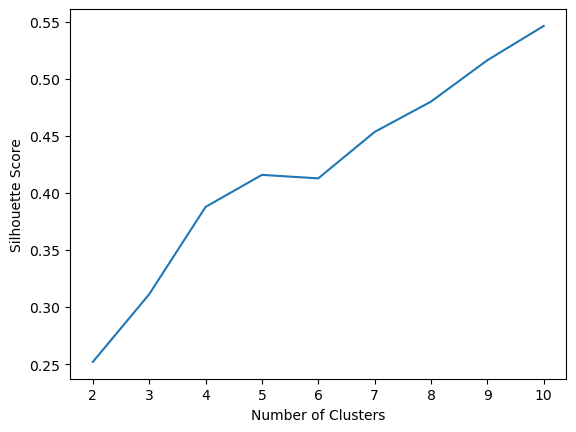

In [25]:
# KMeans clustering with different number of clusters
scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=700)
    kmeans.fit(total_sd.iloc[:,:10])
    score = silhouette_score(total_sd.iloc[:,:10], kmeans.labels_)
    scores.append(score)

# Plotting the silhouette scores
plt.plot(range(2, 11), scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# 환경지표 

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 그래프 시각화 라이브러리 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import warnings
warnings.filterwarnings(action='ignore')

In [27]:
# 데이터 불어오기 
high_school = pd.read_csv("C:\sooeun\DATAexam\ConvergenceProject-School_Violence\Data\서울특별시_스케일링_고등학교지표_230131.csv",index_col = 0)
high_school.columns

Index(['시도교육청코드', '시도교육청명', '표준학교코드', '학교명', '영문학교명', '학교종류명', '소재지명', '시군구',
       '관할조직명', '설립명', '도로명우편번호', '도로명주소', '도로명상세주소', '전화번호', '홈페이지주소',
       '남녀공학구분명', '팩스번호', '고등학교구분명', '산업체특별학급존재여부', '고등학교일반실업구분명',
       '특수목적고등학교계열명', '입시전후기구분명', '주야구분명', '설립일자', '개교기념일', '수정일', '위도', '경도',
       '교실안', '특별실,방과후 교실 등', '복도,계단', '화장실', '운동장,체육관,강당 등', '급식실,매점 등',
       '기숙사', '학원이나학원 근처', '집이나집 근처', 'PC방,노래방,오락실 등', '공원, 놀이터,골목, 공터,뒷산 등',
       '학교 밖체험활동 장소', '사이버공간', '피해장소_기타', '강요', '금품갈취', '신체폭력', '사이버폭력',
       '집단따돌림', '피해유형_기타', '등교시간', '수업시간', '쉬는시간', '점심시간', '학교 안방과후 시간',
       '하교시간', '학교 밖체험활동 시간', '학교 일과가끝난 후', '피해시간_기타', '평균 교육 시간(1학급당)',
       '나의보호자나친척', '학교선생님', '학교상담실선생님', '학교폭력신고함이나학교 익명게시판', '친구나선·후배',
       '학교전담경찰관,경찰', '117학교폭력신고센터', '학교 밖상담 기관', '아무에게도알리지않음', '피해 응답 학생 수',
       '한부모가족지원법수급자_재가보호_가구원수', '국민기초생활보장법수급자_가구원수', '저소득', '중간', '고소득',
       '생활인구수', '다문화가족', '국제결혼가정', '외국인가정', '단란주점수', '성인게임장수', '술집수', '유흥주점수',
       '총 신고 수', '청소년비행신고수', '학교

In [28]:
high_school_new = high_school[['시도교육청코드', '시도교육청명', '표준학교코드', '학교명', '영문학교명', '학교종류명', '소재지명', '시군구',
       '관할조직명', '설립명', '도로명우편번호', '도로명주소', '도로명상세주소', '전화번호', '홈페이지주소',
       '남녀공학구분명', '팩스번호', '고등학교구분명', '산업체특별학급존재여부', '고등학교일반실업구분명',
       '특수목적고등학교계열명', '입시전후기구분명', '주야구분명', '설립일자', '개교기념일','위도', '경도',
                               '한부모가족지원법수급자_재가보호_가구원수', '국민기초생활보장법수급자_가구원수',
            '중간', '고소득','성인게임장수','사건종별가정폭력', '사건종별데이트폭력','월평균소득금액(십만)',
            '다문화가족']]
high_school_new 

,시도교육청코드,시도교육청명,표준학교코드,학교명,영문학교명,학교종류명,소재지명,시군구,관할조직명,설립명,...,경도,한부모가족지원법수급자_재가보호_가구원수,국민기초생활보장법수급자_가구원수,중간,고소득,성인게임장수,사건종별가정폭력,사건종별데이트폭력,월평균소득금액(십만),다문화가족
0,B10,서울특별시교육청,7010057,가락고등학교,Garak High School,고등학교,서울특별시,송파구,서울특별시교육청,공립,...,127.116426,10.587907,41.944982,61.9,21.3,10.0,4.611694,0.673981,39.69562,1.666742
1,B10,서울특별시교육청,7011169,가재울고등학교,Gajaeul High School,고등학교,서울특별시,서대문구,서울특별시교육청,공립,...,126.909530,16.758591,47.709712,46.9,20.2,5.0,3.501553,0.504236,39.43923,1.741705
2,B10,서울특별시교육청,7010117,강동고등학교,Kangdong High School,고등학교,서울특별시,강동구,서울특별시교육청,사립,...,127.160668,14.148759,48.663157,52.6,19.8,15.0,4.690014,0.769964,33.36210,1.334094
3,B10,서울특별시교육청,7010118,강서고등학교,Gangseo High School,고등학교,서울특별시,양천구,서울특별시교육청,사립,...,126.865771,15.982703,58.270272,62.8,13.5,6.0,4.280519,0.412517,35.63309,2.478195
4,B10,서울특별시교육청,7010270,강서공업고등학교,Gangseo Technical High School,고등학교,서울특별시,강서구,서울특별시교육청,공립,...,126.816182,20.076996,67.130300,62.7,17.2,15.0,5.099763,1.060769,31.65221,2.591578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,B10,서울특별시교육청,7010766,효문고등학교,Hyomun High School,고등학교,서울특별시,도봉구,서울특별시교육청,공립,...,127.018400,27.773168,85.260808,56.2,29.7,16.0,5.916945,0.840188,27.13315,1.507146
316,B10,서울특별시교육청,7010292,휘경공업고등학교,Hwigyeong Technical High School,고등학교,서울특별시,동대문구,서울특별시교육청,공립,...,127.069451,17.442884,53.493406,46.3,22.0,16.0,4.093672,0.909075,30.11303,3.348503
317,B10,서울특별시교육청,7010267,휘경여자고등학교,Hwikyung Girls` High School,고등학교,서울특별시,동대문구,서울특별시교육청,사립,...,127.067434,17.442884,53.493406,46.3,22.0,16.0,4.093672,0.909075,30.11303,3.348503
318,B10,서울특별시교육청,7010268,휘문고등학교,Whimoon High School,고등학교,서울특별시,강남구,서울특별시교육청,사립,...,127.061994,6.136110,30.717739,44.9,34.7,2.0,2.146930,1.160593,47.99007,1.330665


In [29]:
high_school_new.rename(columns = {'월평균소득금액(십만)':'월평균소득금액(백만)'},inplace=True)
high_school_new

,시도교육청코드,시도교육청명,표준학교코드,학교명,영문학교명,학교종류명,소재지명,시군구,관할조직명,설립명,...,경도,한부모가족지원법수급자_재가보호_가구원수,국민기초생활보장법수급자_가구원수,중간,고소득,성인게임장수,사건종별가정폭력,사건종별데이트폭력,월평균소득금액(백만),다문화가족
0,B10,서울특별시교육청,7010057,가락고등학교,Garak High School,고등학교,서울특별시,송파구,서울특별시교육청,공립,...,127.116426,10.587907,41.944982,61.9,21.3,10.0,4.611694,0.673981,39.69562,1.666742
1,B10,서울특별시교육청,7011169,가재울고등학교,Gajaeul High School,고등학교,서울특별시,서대문구,서울특별시교육청,공립,...,126.909530,16.758591,47.709712,46.9,20.2,5.0,3.501553,0.504236,39.43923,1.741705
2,B10,서울특별시교육청,7010117,강동고등학교,Kangdong High School,고등학교,서울특별시,강동구,서울특별시교육청,사립,...,127.160668,14.148759,48.663157,52.6,19.8,15.0,4.690014,0.769964,33.36210,1.334094
3,B10,서울특별시교육청,7010118,강서고등학교,Gangseo High School,고등학교,서울특별시,양천구,서울특별시교육청,사립,...,126.865771,15.982703,58.270272,62.8,13.5,6.0,4.280519,0.412517,35.63309,2.478195
4,B10,서울특별시교육청,7010270,강서공업고등학교,Gangseo Technical High School,고등학교,서울특별시,강서구,서울특별시교육청,공립,...,126.816182,20.076996,67.130300,62.7,17.2,15.0,5.099763,1.060769,31.65221,2.591578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,B10,서울특별시교육청,7010766,효문고등학교,Hyomun High School,고등학교,서울특별시,도봉구,서울특별시교육청,공립,...,127.018400,27.773168,85.260808,56.2,29.7,16.0,5.916945,0.840188,27.13315,1.507146
316,B10,서울특별시교육청,7010292,휘경공업고등학교,Hwigyeong Technical High School,고등학교,서울특별시,동대문구,서울특별시교육청,공립,...,127.069451,17.442884,53.493406,46.3,22.0,16.0,4.093672,0.909075,30.11303,3.348503
317,B10,서울특별시교육청,7010267,휘경여자고등학교,Hwikyung Girls` High School,고등학교,서울특별시,동대문구,서울특별시교육청,사립,...,127.067434,17.442884,53.493406,46.3,22.0,16.0,4.093672,0.909075,30.11303,3.348503
318,B10,서울특별시교육청,7010268,휘문고등학교,Whimoon High School,고등학교,서울특별시,강남구,서울특별시교육청,사립,...,127.061994,6.136110,30.717739,44.9,34.7,2.0,2.146930,1.160593,47.99007,1.330665


In [30]:
score = pd.read_csv("C:\sooeun\DATAexam\ConvergenceProject-School_Violence\Data\학교별_종합점수_환경지표.csv", index_col=0)
score_new = score[['학교명','score']]
score_new

,학교명,score
0,가락고등학교,48.715229
1,가재울고등학교,46.193799
2,강동고등학교,55.148267
3,강서고등학교,65.103834
4,강서공업고등학교,77.831186
...,...,...
315,효문고등학교,89.946627
316,휘경공업고등학교,58.574818
317,휘경여자고등학교,58.574818
318,휘문고등학교,19.071217


In [31]:
data1 = pd.merge(high_school_new, score_new, on=['학교명'], how='outer', sort=True)
data1

,시도교육청코드,시도교육청명,표준학교코드,학교명,영문학교명,학교종류명,소재지명,시군구,관할조직명,설립명,...,한부모가족지원법수급자_재가보호_가구원수,국민기초생활보장법수급자_가구원수,중간,고소득,성인게임장수,사건종별가정폭력,사건종별데이트폭력,월평균소득금액(백만),다문화가족,score
0,B10,서울특별시교육청,7010057,가락고등학교,Garak High School,고등학교,서울특별시,송파구,서울특별시교육청,공립,...,10.587907,41.944982,61.9,21.3,10.0,4.611694,0.673981,39.69562,1.666742,48.715229
1,B10,서울특별시교육청,7011169,가재울고등학교,Gajaeul High School,고등학교,서울특별시,서대문구,서울특별시교육청,공립,...,16.758591,47.709712,46.9,20.2,5.0,3.501553,0.504236,39.43923,1.741705,46.193799
2,B10,서울특별시교육청,7010117,강동고등학교,Kangdong High School,고등학교,서울특별시,강동구,서울특별시교육청,사립,...,14.148759,48.663157,52.6,19.8,15.0,4.690014,0.769964,33.36210,1.334094,55.148267
3,B10,서울특별시교육청,7010118,강서고등학교,Gangseo High School,고등학교,서울특별시,양천구,서울특별시교육청,사립,...,15.982703,58.270272,62.8,13.5,6.0,4.280519,0.412517,35.63309,2.478195,65.103834
4,B10,서울특별시교육청,7010270,강서공업고등학교,Gangseo Technical High School,고등학교,서울특별시,강서구,서울특별시교육청,공립,...,20.076996,67.130300,62.7,17.2,15.0,5.099763,1.060769,31.65221,2.591578,77.831186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,B10,서울특별시교육청,7010766,효문고등학교,Hyomun High School,고등학교,서울특별시,도봉구,서울특별시교육청,공립,...,27.773168,85.260808,56.2,29.7,16.0,5.916945,0.840188,27.13315,1.507146,89.946627
316,B10,서울특별시교육청,7010292,휘경공업고등학교,Hwigyeong Technical High School,고등학교,서울특별시,동대문구,서울특별시교육청,공립,...,17.442884,53.493406,46.3,22.0,16.0,4.093672,0.909075,30.11303,3.348503,58.574818
317,B10,서울특별시교육청,7010267,휘경여자고등학교,Hwikyung Girls` High School,고등학교,서울특별시,동대문구,서울특별시교육청,사립,...,17.442884,53.493406,46.3,22.0,16.0,4.093672,0.909075,30.11303,3.348503,58.574818
318,B10,서울특별시교육청,7010268,휘문고등학교,Whimoon High School,고등학교,서울특별시,강남구,서울특별시교육청,사립,...,6.136110,30.717739,44.9,34.7,2.0,2.146930,1.160593,47.99007,1.330665,19.071217


In [32]:
cluster = pd.read_csv("C:/sooeun/DATAexam/ConvergenceProject-School_Violence/Data/서울특별시_고등학교별_cluster_환경지표.csv")
cluster
cluster_new = cluster[['학교명','cluster']]
cluster_new

,학교명,cluster
0,가락고등학교,3
1,가재울고등학교,2
2,강동고등학교,2
3,강서고등학교,2
4,강서공업고등학교,1
...,...,...
315,효문고등학교,1
316,휘경공업고등학교,2
317,휘경여자고등학교,2
318,휘문고등학교,3


In [33]:
data2 = pd.merge(data1, cluster_new, on=['학교명'], how='outer', sort=True)
data2

,시도교육청코드,시도교육청명,표준학교코드,학교명,영문학교명,학교종류명,소재지명,시군구,관할조직명,설립명,...,국민기초생활보장법수급자_가구원수,중간,고소득,성인게임장수,사건종별가정폭력,사건종별데이트폭력,월평균소득금액(백만),다문화가족,score,cluster
0,B10,서울특별시교육청,7010057,가락고등학교,Garak High School,고등학교,서울특별시,송파구,서울특별시교육청,공립,...,41.944982,61.9,21.3,10.0,4.611694,0.673981,39.69562,1.666742,48.715229,3
1,B10,서울특별시교육청,7011169,가재울고등학교,Gajaeul High School,고등학교,서울특별시,서대문구,서울특별시교육청,공립,...,47.709712,46.9,20.2,5.0,3.501553,0.504236,39.43923,1.741705,46.193799,2
2,B10,서울특별시교육청,7010117,강동고등학교,Kangdong High School,고등학교,서울특별시,강동구,서울특별시교육청,사립,...,48.663157,52.6,19.8,15.0,4.690014,0.769964,33.36210,1.334094,55.148267,2
3,B10,서울특별시교육청,7010118,강서고등학교,Gangseo High School,고등학교,서울특별시,양천구,서울특별시교육청,사립,...,58.270272,62.8,13.5,6.0,4.280519,0.412517,35.63309,2.478195,65.103834,2
4,B10,서울특별시교육청,7010270,강서공업고등학교,Gangseo Technical High School,고등학교,서울특별시,강서구,서울특별시교육청,공립,...,67.130300,62.7,17.2,15.0,5.099763,1.060769,31.65221,2.591578,77.831186,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,B10,서울특별시교육청,7010766,효문고등학교,Hyomun High School,고등학교,서울특별시,도봉구,서울특별시교육청,공립,...,85.260808,56.2,29.7,16.0,5.916945,0.840188,27.13315,1.507146,89.946627,1
316,B10,서울특별시교육청,7010292,휘경공업고등학교,Hwigyeong Technical High School,고등학교,서울특별시,동대문구,서울특별시교육청,공립,...,53.493406,46.3,22.0,16.0,4.093672,0.909075,30.11303,3.348503,58.574818,2
317,B10,서울특별시교육청,7010267,휘경여자고등학교,Hwikyung Girls` High School,고등학교,서울특별시,동대문구,서울특별시교육청,사립,...,53.493406,46.3,22.0,16.0,4.093672,0.909075,30.11303,3.348503,58.574818,2
318,B10,서울특별시교육청,7010268,휘문고등학교,Whimoon High School,고등학교,서울특별시,강남구,서울특별시교육청,사립,...,30.717739,44.9,34.7,2.0,2.146930,1.160593,47.99007,1.330665,19.071217,3


In [34]:
data2.rename(columns = {'중간':'소득인식수준_중간소득','고소득':'소득인식수준_고소득'},inplace=True)
data2.columns

Index(['시도교육청코드', '시도교육청명', '표준학교코드', '학교명', '영문학교명', '학교종류명', '소재지명', '시군구',
       '관할조직명', '설립명', '도로명우편번호', '도로명주소', '도로명상세주소', '전화번호', '홈페이지주소',
       '남녀공학구분명', '팩스번호', '고등학교구분명', '산업체특별학급존재여부', '고등학교일반실업구분명',
       '특수목적고등학교계열명', '입시전후기구분명', '주야구분명', '설립일자', '개교기념일', '위도', '경도',
       '한부모가족지원법수급자_재가보호_가구원수', '국민기초생활보장법수급자_가구원수', '소득인식수준_중간소득',
       '소득인식수준_고소득', '성인게임장수', '사건종별가정폭력', '사건종별데이트폭력', '월평균소득금액(백만)', '다문화가족',
       'score', 'cluster'],
      dtype='object')

In [35]:
data2["학교폭력위험도"] = [
    "낮음" if x == 0 else
    "매우높음" if x == 1 else 
    "보통" if x == 2 else 
    "매우낮음" if x == 3 else  
    "높음" for x in data2.cluster]
data2

,시도교육청코드,시도교육청명,표준학교코드,학교명,영문학교명,학교종류명,소재지명,시군구,관할조직명,설립명,...,소득인식수준_중간소득,소득인식수준_고소득,성인게임장수,사건종별가정폭력,사건종별데이트폭력,월평균소득금액(백만),다문화가족,score,cluster,학교폭력위험도
0,B10,서울특별시교육청,7010057,가락고등학교,Garak High School,고등학교,서울특별시,송파구,서울특별시교육청,공립,...,61.9,21.3,10.0,4.611694,0.673981,39.69562,1.666742,48.715229,3,매우낮음
1,B10,서울특별시교육청,7011169,가재울고등학교,Gajaeul High School,고등학교,서울특별시,서대문구,서울특별시교육청,공립,...,46.9,20.2,5.0,3.501553,0.504236,39.43923,1.741705,46.193799,2,보통
2,B10,서울특별시교육청,7010117,강동고등학교,Kangdong High School,고등학교,서울특별시,강동구,서울특별시교육청,사립,...,52.6,19.8,15.0,4.690014,0.769964,33.36210,1.334094,55.148267,2,보통
3,B10,서울특별시교육청,7010118,강서고등학교,Gangseo High School,고등학교,서울특별시,양천구,서울특별시교육청,사립,...,62.8,13.5,6.0,4.280519,0.412517,35.63309,2.478195,65.103834,2,보통
4,B10,서울특별시교육청,7010270,강서공업고등학교,Gangseo Technical High School,고등학교,서울특별시,강서구,서울특별시교육청,공립,...,62.7,17.2,15.0,5.099763,1.060769,31.65221,2.591578,77.831186,1,매우높음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,B10,서울특별시교육청,7010766,효문고등학교,Hyomun High School,고등학교,서울특별시,도봉구,서울특별시교육청,공립,...,56.2,29.7,16.0,5.916945,0.840188,27.13315,1.507146,89.946627,1,매우높음
316,B10,서울특별시교육청,7010292,휘경공업고등학교,Hwigyeong Technical High School,고등학교,서울특별시,동대문구,서울특별시교육청,공립,...,46.3,22.0,16.0,4.093672,0.909075,30.11303,3.348503,58.574818,2,보통
317,B10,서울특별시교육청,7010267,휘경여자고등학교,Hwikyung Girls` High School,고등학교,서울특별시,동대문구,서울특별시교육청,사립,...,46.3,22.0,16.0,4.093672,0.909075,30.11303,3.348503,58.574818,2,보통
318,B10,서울특별시교육청,7010268,휘문고등학교,Whimoon High School,고등학교,서울특별시,강남구,서울특별시교육청,사립,...,44.9,34.7,2.0,2.146930,1.160593,47.99007,1.330665,19.071217,3,매우낮음


In [36]:
data2.rename(columns = {'score':'환경지표_score','cluster':'환경지표_cluster','학교폭력위험도':'환경지표_학교폭력위험도'},inplace=True)
data2.columns

Index(['시도교육청코드', '시도교육청명', '표준학교코드', '학교명', '영문학교명', '학교종류명', '소재지명', '시군구',
       '관할조직명', '설립명', '도로명우편번호', '도로명주소', '도로명상세주소', '전화번호', '홈페이지주소',
       '남녀공학구분명', '팩스번호', '고등학교구분명', '산업체특별학급존재여부', '고등학교일반실업구분명',
       '특수목적고등학교계열명', '입시전후기구분명', '주야구분명', '설립일자', '개교기념일', '위도', '경도',
       '한부모가족지원법수급자_재가보호_가구원수', '국민기초생활보장법수급자_가구원수', '소득인식수준_중간소득',
       '소득인식수준_고소득', '성인게임장수', '사건종별가정폭력', '사건종별데이트폭력', '월평균소득금액(백만)', '다문화가족',
       '환경지표_score', '환경지표_cluster', '환경지표_학교폭력위험도'],
      dtype='object')

In [37]:
data2.dtypes

시도교육청코드                   object
시도교육청명                    object
표준학교코드                     int64
학교명                       object
영문학교명                     object
학교종류명                     object
소재지명                      object
시군구                       object
관할조직명                     object
설립명                       object
도로명우편번호                    int64
도로명주소                     object
도로명상세주소                   object
전화번호                      object
홈페이지주소                    object
남녀공학구분명                   object
팩스번호                      object
고등학교구분명                   object
산업체특별학급존재여부               object
고등학교일반실업구분명               object
특수목적고등학교계열명               object
입시전후기구분명                  object
주야구분명                     object
설립일자                       int64
개교기념일                      int64
위도                       float64
경도                       float64
한부모가족지원법수급자_재가보호_가구원수    float64
국민기초생활보장법수급자_가구원수        float64
소득인식수준_중간소득              float64
소득인식수준_고소득

In [38]:
# 저장 후 주석처리 
data2.to_csv("C:/sooeun/DATAexam/ConvergenceProject-School_Violence/Data/서울특별시_고등학교_환경지표_school_region.csv")

In [39]:
data2.columns

Index(['시도교육청코드', '시도교육청명', '표준학교코드', '학교명', '영문학교명', '학교종류명', '소재지명', '시군구',
       '관할조직명', '설립명', '도로명우편번호', '도로명주소', '도로명상세주소', '전화번호', '홈페이지주소',
       '남녀공학구분명', '팩스번호', '고등학교구분명', '산업체특별학급존재여부', '고등학교일반실업구분명',
       '특수목적고등학교계열명', '입시전후기구분명', '주야구분명', '설립일자', '개교기념일', '위도', '경도',
       '한부모가족지원법수급자_재가보호_가구원수', '국민기초생활보장법수급자_가구원수', '소득인식수준_중간소득',
       '소득인식수준_고소득', '성인게임장수', '사건종별가정폭력', '사건종별데이트폭력', '월평균소득금액(백만)', '다문화가족',
       '환경지표_score', '환경지표_cluster', '환경지표_학교폭력위험도'],
      dtype='object')

# DB_학교정보

In [40]:
school_data = data2[['시도교육청코드', '시도교육청명', '표준학교코드', '학교명', '영문학교명', '학교종류명', '소재지명', '시군구',
       '관할조직명', '설립명', '도로명우편번호', '도로명주소', '도로명상세주소', '전화번호', '홈페이지주소',
       '남녀공학구분명', '팩스번호', '고등학교구분명', '산업체특별학급존재여부', '고등학교일반실업구분명',
       '특수목적고등학교계열명', '입시전후기구분명', '주야구분명', '설립일자', '개교기념일', '위도', '경도']]
school_data

,시도교육청코드,시도교육청명,표준학교코드,학교명,영문학교명,학교종류명,소재지명,시군구,관할조직명,설립명,...,고등학교구분명,산업체특별학급존재여부,고등학교일반실업구분명,특수목적고등학교계열명,입시전후기구분명,주야구분명,설립일자,개교기념일,위도,경도
0,B10,서울특별시교육청,7010057,가락고등학교,Garak High School,고등학교,서울특별시,송파구,서울특별시교육청,공립,...,일반고,N,일반계,NaN,후기,주간,19881223,19890428,37.501076,127.116426
1,B10,서울특별시교육청,7011169,가재울고등학교,Gajaeul High School,고등학교,서울특별시,서대문구,서울특별시교육청,공립,...,일반고,N,일반계,NaN,후기,주간,20130301,20130501,37.574364,126.909530
2,B10,서울특별시교육청,7010117,강동고등학교,Kangdong High School,고등학교,서울특별시,강동구,서울특별시교육청,사립,...,일반고,N,일반계,NaN,후기,주간,19841217,19850908,37.549917,127.160668
3,B10,서울특별시교육청,7010118,강서고등학교,Gangseo High School,고등학교,서울특별시,양천구,서울특별시교육청,사립,...,일반고,N,일반계,NaN,후기,주간,19831101,19831101,37.536316,126.865771
4,B10,서울특별시교육청,7010270,강서공업고등학교,Gangseo Technical High School,고등학교,서울특별시,강서구,서울특별시교육청,공립,...,특성화고,N,전문계,NaN,전기,주간,19940105,19940105,37.576034,126.816182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,B10,서울특별시교육청,7010766,효문고등학교,Hyomun High School,고등학교,서울특별시,도봉구,서울특별시교육청,공립,...,일반고,N,일반계,NaN,후기,주간,20051229,20060605,37.652699,127.018400
316,B10,서울특별시교육청,7010292,휘경공업고등학교,Hwigyeong Technical High School,고등학교,서울특별시,동대문구,서울특별시교육청,공립,...,특성화고,N,전문계,NaN,전기,주간,19971220,19980702,37.585153,127.069451
317,B10,서울특별시교육청,7010267,휘경여자고등학교,Hwikyung Girls` High School,고등학교,서울특별시,동대문구,서울특별시교육청,사립,...,일반고,N,일반계,NaN,후기,주간,19750303,19750519,37.581901,127.067434
318,B10,서울특별시교육청,7010268,휘문고등학교,Whimoon High School,고등학교,서울특별시,강남구,서울특별시교육청,사립,...,자율고,N,일반계,NaN,전기,주간,19060501,19060501,37.505289,127.061994


In [41]:
# 저장 후 주석처리 
school_data.to_csv("C:/sooeun/DATAexam/ConvergenceProject-School_Violence/Data/DB_서울특별시_고등학교_정보.csv")

In [43]:
data2.columns

Index(['시도교육청코드', '시도교육청명', '표준학교코드', '학교명', '영문학교명', '학교종류명', '소재지명', '시군구',
       '관할조직명', '설립명', '도로명우편번호', '도로명주소', '도로명상세주소', '전화번호', '홈페이지주소',
       '남녀공학구분명', '팩스번호', '고등학교구분명', '산업체특별학급존재여부', '고등학교일반실업구분명',
       '특수목적고등학교계열명', '입시전후기구분명', '주야구분명', '설립일자', '개교기념일', '위도', '경도',
       '한부모가족지원법수급자_재가보호_가구원수', '국민기초생활보장법수급자_가구원수', '소득인식수준_중간소득',
       '소득인식수준_고소득', '성인게임장수', '사건종별가정폭력', '사건종별데이트폭력', '월평균소득금액(백만)', '다문화가족',
       '환경지표_score', '환경지표_cluster', '환경지표_학교폭력위험도'],
      dtype='object')

# 환경지표(region_features)

In [45]:
region_features = data2[['시군구','한부모가족지원법수급자_재가보호_가구원수', '국민기초생활보장법수급자_가구원수', '소득인식수준_중간소득',
       '소득인식수준_고소득', '성인게임장수', '사건종별가정폭력', '사건종별데이트폭력', '월평균소득금액(백만)', '다문화가족',
       '환경지표_score', '환경지표_cluster', '환경지표_학교폭력위험도']]
region_features

,시군구,한부모가족지원법수급자_재가보호_가구원수,국민기초생활보장법수급자_가구원수,소득인식수준_중간소득,소득인식수준_고소득,성인게임장수,사건종별가정폭력,사건종별데이트폭력,월평균소득금액(백만),다문화가족,환경지표_score,환경지표_cluster,환경지표_학교폭력위험도
0,송파구,10.587907,41.944982,61.9,21.3,10.0,4.611694,0.673981,39.69562,1.666742,48.715229,3,매우낮음
1,서대문구,16.758591,47.709712,46.9,20.2,5.0,3.501553,0.504236,39.43923,1.741705,46.193799,2,보통
2,강동구,14.148759,48.663157,52.6,19.8,15.0,4.690014,0.769964,33.36210,1.334094,55.148267,2,보통
3,양천구,15.982703,58.270272,62.8,13.5,6.0,4.280519,0.412517,35.63309,2.478195,65.103834,2,보통
4,강서구,20.076996,67.130300,62.7,17.2,15.0,5.099763,1.060769,31.65221,2.591578,77.831186,1,매우높음
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,도봉구,27.773168,85.260808,56.2,29.7,16.0,5.916945,0.840188,27.13315,1.507146,89.946627,1,매우높음
316,동대문구,17.442884,53.493406,46.3,22.0,16.0,4.093672,0.909075,30.11303,3.348503,58.574818,2,보통
317,동대문구,17.442884,53.493406,46.3,22.0,16.0,4.093672,0.909075,30.11303,3.348503,58.574818,2,보통
318,강남구,6.136110,30.717739,44.9,34.7,2.0,2.146930,1.160593,47.99007,1.330665,19.071217,3,매우낮음


In [47]:
region_features_new = region_features[~region_features.duplicated()]
region_features_new.reset_index(drop=True, inplace=True)

In [ ]:
region_features_new = region_features_new.sort_values(by = ['시군구'],ascending=True)
region_features_new.reset_index(drop=True, inplace=True)
region_features_new

In [52]:
# 저장 후 주석처리 
region_features_new.to_csv("C:/sooeun/DATAexam/ConvergenceProject-School_Violence/Data/DB_서울특별시_고등학교_학교폭력_환경지표_region_features.csv")

# DB_환경지표

In [48]:
db_enviro = data2[['시군구','환경지표_score', '환경지표_cluster', '환경지표_학교폭력위험도']]
db_enviro

,시군구,환경지표_score,환경지표_cluster,환경지표_학교폭력위험도
0,송파구,48.715229,3,매우낮음
1,서대문구,46.193799,2,보통
2,강동구,55.148267,2,보통
3,양천구,65.103834,2,보통
4,강서구,77.831186,1,매우높음
...,...,...,...,...
315,도봉구,89.946627,1,매우높음
316,동대문구,58.574818,2,보통
317,동대문구,58.574818,2,보통
318,강남구,19.071217,3,매우낮음


In [49]:
db_enviro_new = db_enviro.drop_duplicates()
db_enviro_new

,시군구,환경지표_score,환경지표_cluster,환경지표_학교폭력위험도
0,송파구,48.715229,3,매우낮음
1,서대문구,46.193799,2,보통
2,강동구,55.148267,2,보통
3,양천구,65.103834,2,보통
4,강서구,77.831186,1,매우높음
6,강남구,19.071217,3,매우낮음
7,광진구,60.193732,2,보통
9,노원구,73.827367,2,보통
10,종로구,32.341505,0,낮음
12,성북구,50.472787,2,보통


In [50]:
db_enviro_new.sort_values('시군구',ascending=True,inplace=True)
db_enviro_new

,시군구,환경지표_score,환경지표_cluster,환경지표_학교폭력위험도
6,강남구,19.071217,3,매우낮음
2,강동구,55.148267,2,보통
105,강북구,105.369939,1,매우높음
4,강서구,77.831186,1,매우높음
32,관악구,77.867433,4,높음
7,광진구,60.193732,2,보통
19,구로구,70.972259,4,높음
43,금천구,90.229114,1,매우높음
9,노원구,73.827367,2,보통
49,도봉구,89.946627,1,매우높음


In [51]:
db_enviro_new.reset_index(drop=False, inplace=True)
db_enviro_new

,index,시군구,환경지표_score,환경지표_cluster,환경지표_학교폭력위험도
0,6,강남구,19.071217,3,매우낮음
1,2,강동구,55.148267,2,보통
2,105,강북구,105.369939,1,매우높음
3,4,강서구,77.831186,1,매우높음
4,32,관악구,77.867433,4,높음
5,7,광진구,60.193732,2,보통
6,19,구로구,70.972259,4,높음
7,43,금천구,90.229114,1,매우높음
8,9,노원구,73.827367,2,보통
9,49,도봉구,89.946627,1,매우높음


In [52]:
db_enviro_new_2 = db_enviro_new.drop(['index'],axis=1)
db_enviro_new_2

,시군구,환경지표_score,환경지표_cluster,환경지표_학교폭력위험도
0,강남구,19.071217,3,매우낮음
1,강동구,55.148267,2,보통
2,강북구,105.369939,1,매우높음
3,강서구,77.831186,1,매우높음
4,관악구,77.867433,4,높음
5,광진구,60.193732,2,보통
6,구로구,70.972259,4,높음
7,금천구,90.229114,1,매우높음
8,노원구,73.827367,2,보통
9,도봉구,89.946627,1,매우높음


In [53]:
# 저장 후 주석처리 
db_enviro_new_2.to_csv("C:/sooeun/DATAexam/ConvergenceProject-School_Violence/Data/DB_서울특별시_고등학교_학교폭력_환경지표.csv")